In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pulse_pair_doppler import pulse_pair_doppler

In [189]:
# TODO add satellite motion

model = pulse_pair_doppler(
    t_pulse=1e-4,                   # s
    t_receive=20e-4,                # s 
    t_interpulse=1e-4,                 # s
    n_reflectors=100000,            # -    TODO why does this number increase error?
    n_pulses=2,                     # -
    n_bursts=35,                    # -
    bandwidth=1e6,                  # hz
    baseband=0*5.405e9,             # hz   TODO why does this number increase error?
    oversample_retriev=1,           # -    TODO why does this number increase error?
    range_cell_avg_factor=3,        # -
    range_cell_size_frac_pulse=1,   # -
    seed=4,                         # -
)

# Single Pulse

In [190]:
model.chirp()
model.pulse_pairs()
model.simulate_reflection()
model.pulse_compress()
model.delayed_autocorrelation()
model.phase_difference()

Autocorrelation cell: 100%|██████████| 20/20 [00:00<00:00, 18347.79it/s]


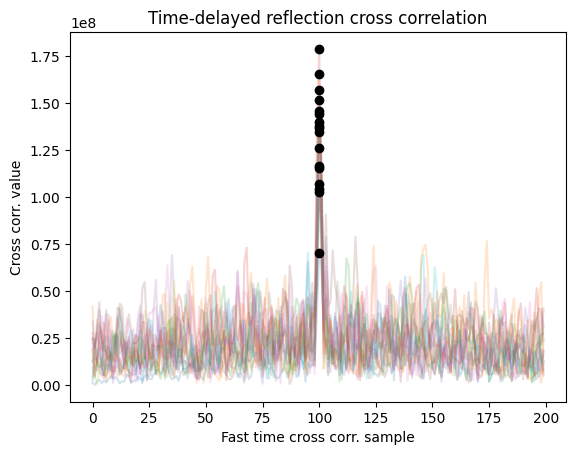

In [191]:
sig = abs(model.corr.T)
peaks = np.argmax(sig, axis = 0)

plt.figure()
plt.title("Time-delayed reflection cross correlation"); plt.xlabel("Fast time cross corr. sample"); plt.ylabel("Cross corr. value"); 
plt.plot(sig, alpha = 0.2, zorder = 1)
plt.scatter(peaks, sig[peaks, np.arange(len(model.corr))], c = 'k', zorder =2)

In [192]:
phase_diff = model.phase_diff_avg_rg

phase_diff_rmse = np.sqrt(np.mean(phase_diff**2))

c = 3e8 # m/s
Lambda = 0.05 # c/f # m
t_delta = model.t_pulse + model.t_interpulse

LoS_velocity_phase = phase_diff * Lambda / (2*np.pi * t_delta)
LoS_velocity_phase_median = phase_diff_rmse * Lambda / (2*np.pi * t_delta)

print(f"\n RMSE phase error of: {phase_diff_rmse:.4f} rad, which is equal to {LoS_velocity_phase_median:.3f} m/s ")


 RMSE phase error of: 0.0674 rad, which is equal to 2.683 m/s 


# Multi burst

In [193]:
model.azimuth_average()

Burst number: 100%|██████████| 35/35 [00:24<00:00,  1.41it/s]


In [195]:
phase_diff = model.phase_diffs_avg_rg_az

phase_diff_rmse = np.sqrt(np.mean(model.phase_diffs_avg_rg_az**2))

c = 3e8 # m/s
Lambda = 0.05 #c/f # m
t_delta = model.t_pulse + model.t_interpulse

LoS_velocity_phase = phase_diff * Lambda / (2*np.pi * t_delta)
LoS_velocity_phase_median = phase_diff_rmse * Lambda / (2*np.pi * t_delta)

print(f"\n RMSE phase error of: {phase_diff_rmse:.4f} rad, which is equal to {LoS_velocity_phase_median:.3f} m/s ")


 RMSE phase error of: 0.0125 rad, which is equal to 0.496 m/s 


In [170]:
# # for selecting indexes of correlation manually
# t = np.argmax(abs(model.corr), axis = 2)
# row_indices, col_indices = np.indices(t.shape)
# selected_values = model.corr[row_indices, col_indices, t]